In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyod.models.auto_encoder import AutoEncoder
%matplotlib notebook

Using TensorFlow backend.
/home/c/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/c/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/c/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/c/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py

## Loading the Data from other files

In [2]:
filename = 'df_processed_calocalTop2dRgr10'
infile = open(filename,'rb')
df = pickle.load(infile)
infile.close()

In [3]:
filename = 'df_processed_calocalTop2dRgr0'
infile = open(filename,'rb')
df2 = pickle.load(infile)
infile.close()

### Test the data is in the right format

In [4]:
df.head()

,eta,phi,Events
1,0.0,1.0,0.0
2,0.0,2.0,0.0
3,0.0,3.0,0.0
4,0.0,4.0,0.0
5,0.0,5.0,0.0


### Outlier Detection using Auto Encoder Neural Network

In [15]:
Z = df2[['eta','phi','Events']]

#set parameters
outliers_fraction = 0.05 #outliers_fraction = 0.003

#train the ML algorithm
clf = AutoEncoder(hidden_neurons =[3,2,1,2,3], contamination = outliers_fraction, epochs=500)
clf.fit(Z)
predictions = clf.labels_  # binary labels (0: inliers, 1: outliers)
scores = clf.decision_scores_  # raw outlier scores
#########################
try:
    df2 = df2.drop('outlier',1)
except:
    print("")

#########################
df2['outlier'] = predictions
#########################
color = np.where(df2['outlier'] == 1, 'red', 'black')
#########################

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_13 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_14 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_15 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                

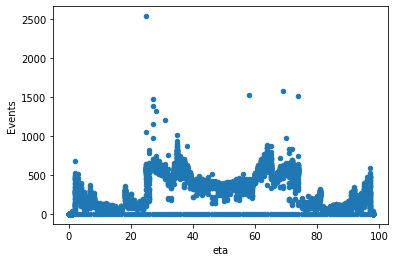

In [9]:
df2.plot.scatter('eta','Events')

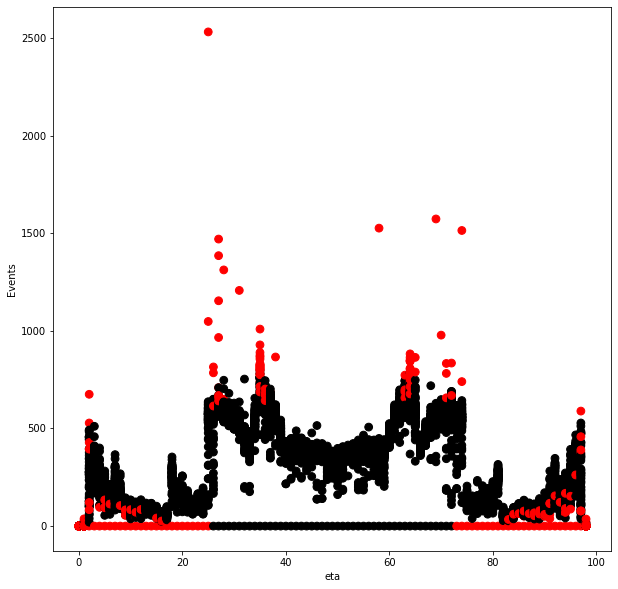

In [10]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df2['eta'], df2['Events'], c=color, s=60)
plt.xlabel('eta')
plt.ylabel('Events')
plt.show()

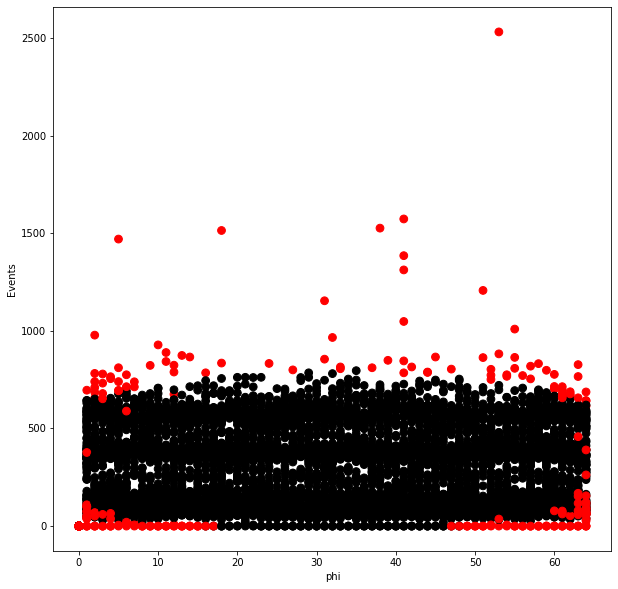

In [11]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df2['phi'], df2['Events'], c=color, s=60)
plt.xlabel('phi')
plt.ylabel('Events')
plt.show()

### Using the AutoEncoder Model trained with the >0.0GeV dataset to predict outliers on the >10.0GeV dataset

In [12]:
try:
    df = df.drop('outlier',1)
except:
    print("")

clf.predict(df)    
#########################
df2['outlier'] = predictions
#########################
color = np.where(df2['outlier'] == 1, 'red', 'black')
#########################

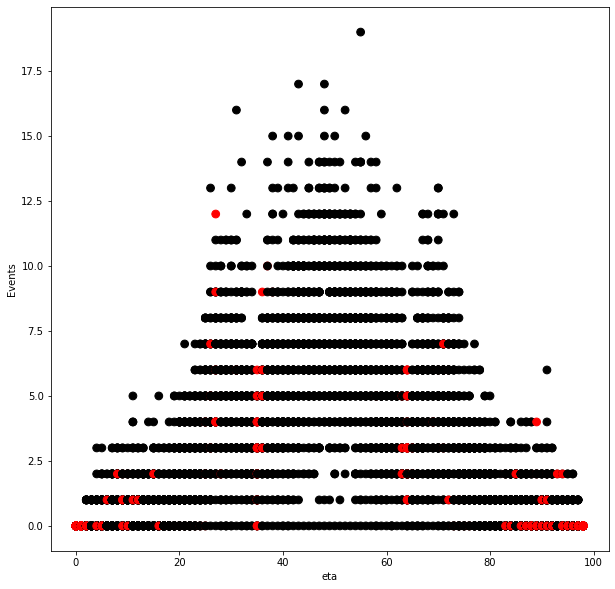

In [13]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['eta'], df['Events'], c=color, s=60)
plt.xlabel('eta')
plt.ylabel('Events')
plt.show()

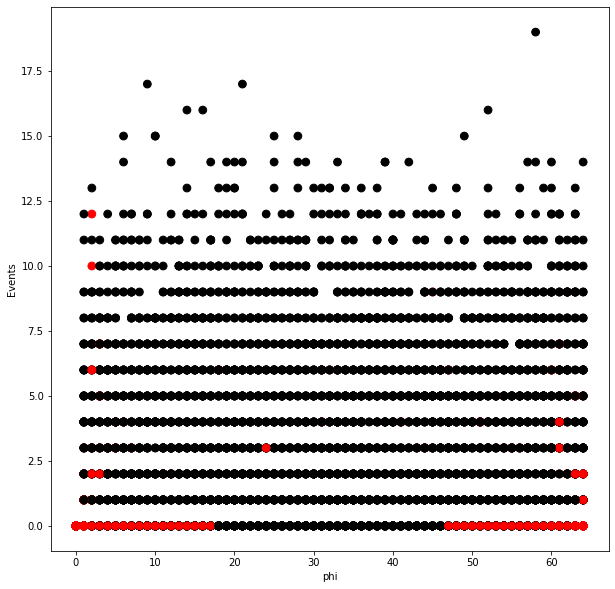

In [14]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['phi'], df['Events'], c=color, s=60)
plt.xlabel('phi')
plt.ylabel('Events')
plt.show()

In [64]:
Z = df[['eta','phi','Events']]

#set parameters
outliers_fraction = 0.05 #outliers_fraction = 0.003

#train the ML algorithm
clf = AutoEncoder(hidden_neurons =[5,4,2,4,5], contamination = outliers_fraction, epochs=500)
clf.fit(Z)
predictions = clf.labels_  # binary labels (0: inliers, 1: outliers)
scores = clf.decision_scores_  # raw outlier scores
#########################
try:
    df = df.drop('outlier',1)
except:
    print("")

#########################
df['outlier'] = predictions
#########################
color = np.where(df['outlier'] == 1, 'red', 'black')
#########################

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_65 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_74 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_66 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_75 (Dense)             (None, 5)                 20        
_________________________________________________________________
dropout_67 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_76 (Dense)             (None, 4)                

<IPython.core.display.Javascript object>


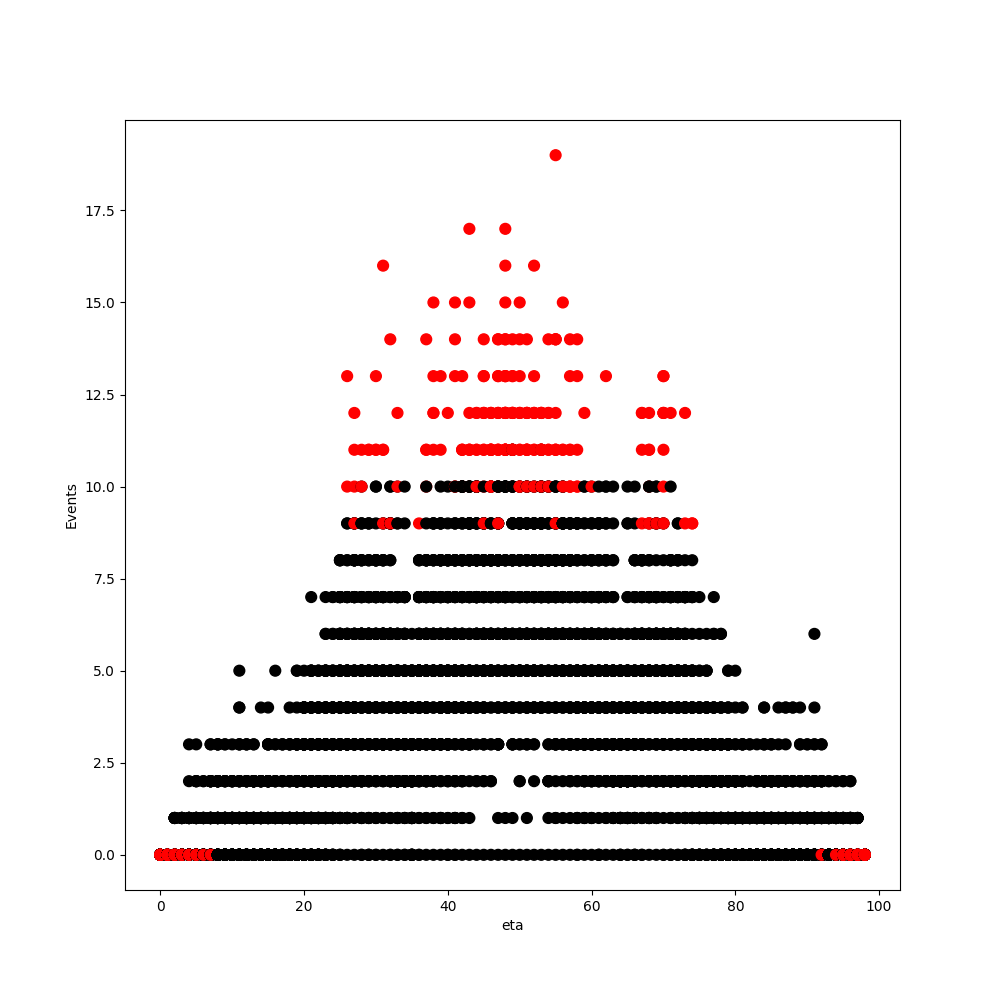

In [72]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['eta'], df['Events'], c=color, s=60)
plt.xlabel('eta')
plt.ylabel('Events')
plt.show()

<IPython.core.display.Javascript object>


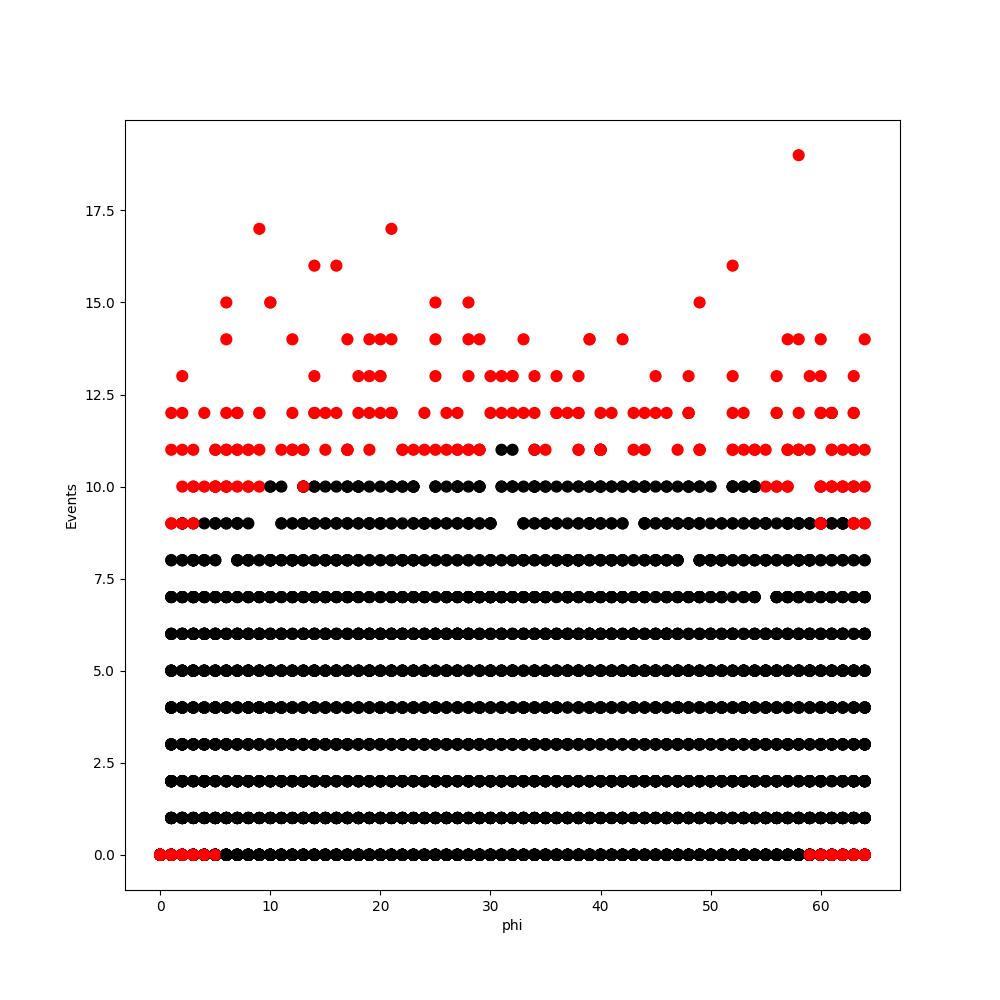

In [75]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['phi'], df['Events'], c=color, s=60)
plt.xlabel('phi')
plt.ylabel('Events')
plt.show()

<IPython.core.display.Javascript object>


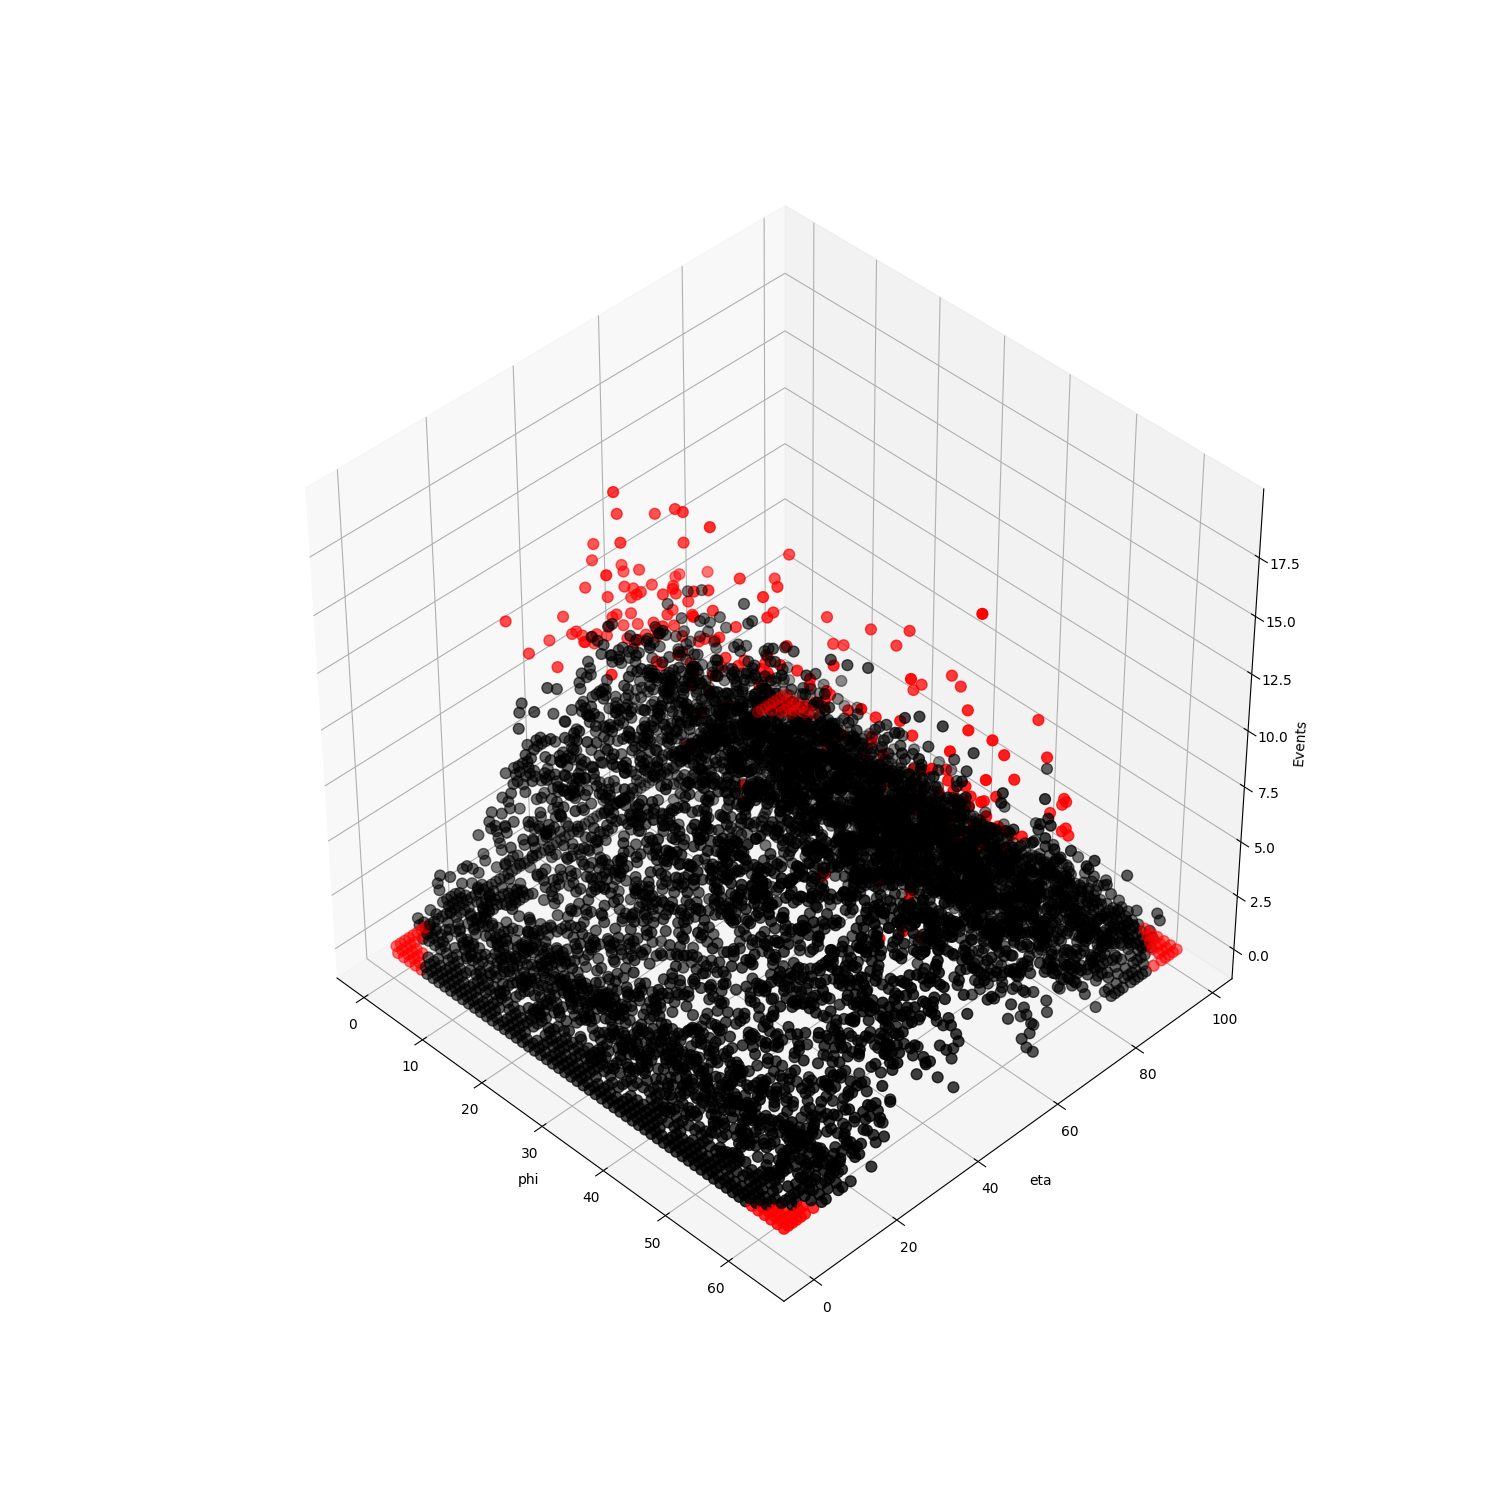

In [22]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['phi'],df['eta'], df['Events'], c=color, s=60) #ax.scatter(df['eta'], df['phi'], df['Events'], c=color, s=60)
ax.view_init(30, 185)
ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.set_zlabel('Events')
plt.show()

### More research is required on how to optimize the AutoEncoder. it has many hyperparameters that should be tuned, plust there needs to be an evaluation of its performance. Try and compare different models like on the towardsdatascience AutoEncoder article
- possibly add more data, lots more data by going into the persistentdata file, reading in a bunch of more run histograms, maybe all the histograms, maybe many runs of the same histogram (calocalTopoCluster-2drates-Gr10GeV
- either way, there has to be a way to make this thing recognize the lower event outlier that is on the right side of the eta,Events plot. It typically misses that one and I feel like we can safely identify this as an anomalous data point
#### In an unrelated point, how do we filter noise? should we? I can try

### After reading the following source, it appears that I may have to train the autoencoder on data after outliers have already been removed THEN apply it to a dataset with outliers still present
This idea is similar to what Dr.Sawyer was mentioning. I can find a bunch of runs/datasets that have no anomalies and it can be the same calocaltopocluster/2drates/gr10gev histogram, but it will train only on good data. The disadvantage of this is that it will not necessarily find new and undiscovered patterns/outliers. It will be trained by what a human thinks is normal or not. On the other hand, after it has been trained it could pick up outliers that we havnt seen because we just miss things that deviate from the norm
- https://blog.goodaudience.com/neural-networks-for-anomaly-outliers-detection-a454e3fdaae8
- I think the main solution is to process more runs of this kind of plot and just feed it as much data as possible
- as LOF is likely the most effective standard ML algorithm, we can use that as a way  to test the AutoEncoders effectiveness or assist in improving finding outliers or even feed it data that is cleaner from outliers

### Update 3-31-2020
- Try training the >10.0GeV file on multiple  >10.0GeV files from different runs. It appears that since each type of file is different, the individual file types will have to be modelled/trained in order to predict outliers accordingly
- if I could write a function that reads the whole run file, separates the individual file types from each other in individual dataframes (df1=calocaltopocluster/2drates/GR10, df2 = .../GR0, df3=etc)
 - do all run files have the same structure? that will be helpful to know when I am doing something like looping through the run files trying to store them in a certain way